In [64]:
import numpy as np
#import numpy.ma as ma
from uncertainties import ufloat, unumpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

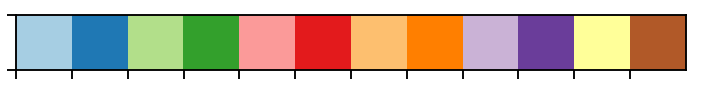

In [102]:
sns.set_context('talk')
sns.palplot(sns.color_palette("Paired"))

# Constants

In [103]:
C = 299792458 # Speed of light in [m/s]

In [104]:
f_88 = 434829121311*1000 # [Hz] 1S0-3P1 resonsnance in 88Sr
wavelength = C/f_88 # [m] (approximate) wavelength of dimple light

# Functions

In [105]:
def waist_z(z, z0, w0):
    zR = np.pi*(w0**2)/wavelength
    w_squared = (w0**2)*(1+((z-z0)**2)/(zR**2))
    return unumpy.sqrt(w_squared)

# Read in data

In [106]:
data = pd.read_excel('dimple_profile.xlsx')
data.head()

,Track dist [mm],Calculated dist [mm],Calculated dist [cm],V width e^-2 [um],V std. dev. [um],W width e^-2 [um],W std. dev. [um]
0,60,12.2,1.22,1777.00,3.20,1847.72,2.42
1,80,32.2,3.22,1661.04,4.92,1705.53,2.98
2,100,52.2,5.22,1535.89,2.98,1544.47,2.33
3,120,72.2,7.22,1407.27,4.49,1414.37,2.01
4,140,92.2,9.22,1260.54,2.30,1280.27,2.14


# Plotting

In [107]:
# Fitted beam parameters

# Horizontal waist
z0x = ufloat(27.1731, 0.069599)/100 # Horizontal waist location in [m]
w0x = ufloat(64.8699, 1.5507)/1E6 # Horizontal waist location in [m]

# Vertical waist
z0y = ufloat(26.9788, 0.065899)/100 # Vertical waist location in [m]
w0y = ufloat(59.5269, 1.1308)/1E6 # Horizontal waist location in [m]

z_fit = np.linspace(-10E-2, 60E-2, 1000)
wx_fit = waist_z(z_fit, z0x, w0x)
wy_fit = waist_z(z_fit, z0y, w0y)

# Scaling for plotting
z_fit = z_fit*100 # [cm]
wx_fit = wx_fit*1E6 # [um]
wy_fit = wy_fit*1E6 # [um]

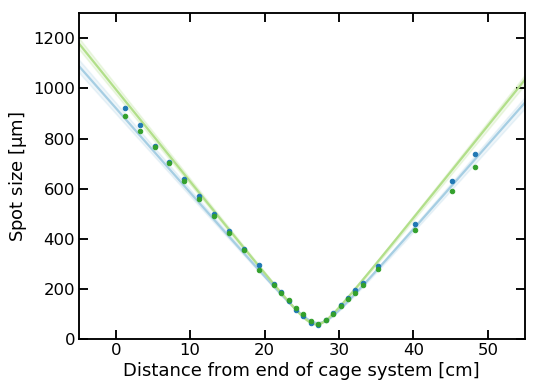

In [128]:
# Data plot options
data_kwargs = {'fmt':'.'}

# Data from excel file
z = data['Calculated dist [cm]'] # Distances from reference point in [m]
wx = unumpy.uarray(data['W width e^-2 [um]'], data['W std. dev. [um]'])/2 # Radius from width in [um]
wy = unumpy.uarray(data['V width e^-2 [um]'], data['V std. dev. [um]'])/2 # Radius from width in [um]

# Plotting
plt.figure(figsize=(8,6))

plt.errorbar(z, unumpy.nominal_values(wx), yerr=unumpy.std_devs(wx), **data_kwargs, 
             color=sns.color_palette("Paired")[1])
plt.errorbar(z, unumpy.nominal_values(wy), yerr=unumpy.std_devs(wy), **data_kwargs,
             color=sns.color_palette("Paired")[3])


plt.plot(z_fit, unumpy.nominal_values(wx_fit), color=sns.color_palette("Paired")[0])
plt.fill_between(z_fit,
                 unumpy.nominal_values(wx_fit) + unumpy.std_devs(wx_fit),
                 unumpy.nominal_values(wx_fit) - unumpy.std_devs(wx_fit),
                 alpha=0.2,
                 color=sns.color_palette("Paired")[0])

plt.plot(z_fit, unumpy.nominal_values(wy_fit), color=sns.color_palette("Paired")[2])
plt.fill_between(z_fit,
                 unumpy.nominal_values(wy_fit) + unumpy.std_devs(wy_fit),
                 unumpy.nominal_values(wy_fit) - unumpy.std_devs(wy_fit),
                 alpha=0.2,
                 color=sns.color_palette("Paired")[2])

# Tick settings
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.gca().tick_params(axis='both',direction='in')

# Axis limits
plt.xlim(-5,55)
plt.ylim(0, 1300)

# Axes labels
plt.xlabel(r'Distance from end of cage system [cm]')
plt.ylabel(r'Spot size [$\rm{{\mu}m}$]')

plt.show()